In [1]:
%cd /mnt/i/Yuki/workspace/exercises/Gasyori100knock

/mnt/i/Yuki/workspace/exercises/Gasyori100knock


https://github.com/yoyoyo-yo/Gasyori100knock/tree/master/Question_61_70

# 準備

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [3]:
imori_img_path = 'Question_61_70/imori.jpg'
imori_img = cv2.imread(imori_img_path)

renketsu_img_path = 'Question_61_70/renketsu.png'
renketsu_img = cv2.imread(renketsu_img_path, cv2.IMREAD_GRAYSCALE)

gazo_img_path = 'Question_61_70/gazo.png'
gazo_img = cv2.imread(gazo_img_path, cv2.IMREAD_GRAYSCALE)

## OpenCV は BGR を採用しているので RGB に変換する
BGR を採用している理由は単なる歴史的経緯らしい

In [4]:
imori_img = imori_img[:, :, ::-1]
renketsu_img = renketsu_img[:, :]
gazo_img = gazo_img[:, :]

# 問題

## Q.61. 4-連結数

In [5]:
result = np.ones_like(renketsu_img).astype(np.int) * -1
tmp = np.zeros_like(renketsu_img).astype(np.int)
tmp[renketsu_img > 0] = 1
tmp = np.pad(tmp, (1, 1), 'constant')

for i in range(result.shape[0]):
    for j in range(result.shape[1]):
        # x4(x-1,y-1) x3(x,y-1) x2(x+1,y-1)
        # x5(x-1,y)   x0(x,y)   x1(x+1,y)
        # x6(x-1,y+1) x7(x,y+1) x8(x+1,y+1)
        x4, x3, x2 = tmp[i, j:j+3]
        x5, x0, x1 = tmp[i+1, j:j+3]
        x6, x7, x8 = tmp[i+2, j:j+3]
        if x0 == 0.0:
            continue
        result[i, j] = (x1 - x1 * x2 * x3) + (x3 - x3 * x4 * x5) + (x5 - x5 * x6 * x7) + (x7 - x7 * x8 * x1) 

In [6]:
colors = np.zeros((*result.shape, 3)).astype(np.uint8)
colors[result == -1] = [0, 0, 0]
colors[result == 0] = [255, 0, 0]
colors[result == 1] = [0, 255, 0]
colors[result == 2] = [0, 0, 255]
colors[result == 3] = [255, 0, 255]
colors[result == 4] = [255, 255, 0]

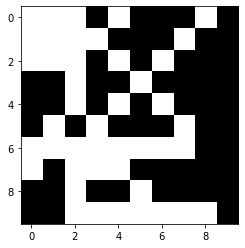

In [7]:
plt.imshow(renketsu_img, cmap='gray')

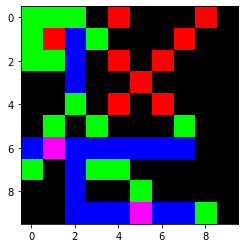

In [8]:
plt.imshow(colors)

## Q.62. 8-連結数

In [9]:
result = np.ones_like(renketsu_img).astype(np.int) * -1
tmp = np.zeros_like(renketsu_img).astype(np.int)
tmp[renketsu_img > 0] = 1
tmp = 1 - tmp
tmp = np.pad(tmp, (1, 1), 'constant')

for i in range(result.shape[0]):
    for j in range(result.shape[1]):
        # x4(x-1,y-1) x3(x,y-1) x2(x+1,y-1)
        # x5(x-1,y)   x0(x,y)   x1(x+1,y)
        # x6(x-1,y+1) x7(x,y+1) x8(x+1,y+1)
        x4, x3, x2 = tmp[i, j:j+3]
        x5, x0, x1 = tmp[i+1, j:j+3]
        x6, x7, x8 = tmp[i+2, j:j+3]
        if x0 == 1:
            continue
        result[i, j] = (x1 - x1 * x2 * x3) + (x3 - x3 * x4 * x5) + (x5 - x5 * x6 * x7) + (x7 - x7 * x8 * x1) 

In [10]:
colors = np.zeros((*result.shape, 3)).astype(np.uint8)
colors[result == -1] = [0, 0, 0]
colors[result == 0] = [255, 0, 0]
colors[result == 1] = [0, 255, 0]
colors[result == 2] = [0, 0, 255]
colors[result == 3] = [255, 0, 255]
colors[result == 4] = [255, 255, 0]

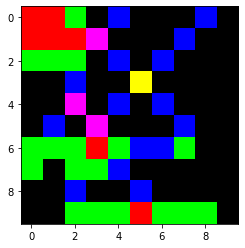

In [11]:
plt.imshow(colors)

## Q.63. 細線化処理

In [12]:
result = np.zeros_like(gazo_img).astype(np.int)
result[gazo_img > 0] = 1

while True:
    scan_count = 0
    tmp = result.copy()
    tmp = np.pad(tmp, (1, 1), 'constant')
    for i in range(result.shape[0]):
        for j in range(result.shape[1]):
            x4, x3, x2 = tmp[i, j:j+3]
            x5, x0, x1 = tmp[i+1, j:j+3]
            x6, x7, x8 = tmp[i+2, j:j+3]
            if x0 == 0:
                continue
            if x1 + x3 + x5 + x7 == 4:
                continue
            concat4 = (x1 - x1 * x2 * x3) + (x3 - x3 * x4 * x5) + (x5 - x5 * x6 * x7) + (x7 - x7 * x8 * x1) 
            if concat4 != 1:
                continue
            if x1 + x2 + x3 + x4 + x5 + x6 + x7 + x8 <= 2:
                continue

            result[i, j] = 0
            scan_count += 1
    
    if scan_count == 0:
        break

result *= 255

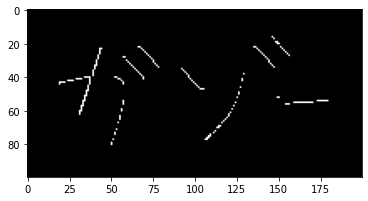

In [13]:
plt.imshow(result, cmap='gray')

## Q.64. ヒルディッチの細線化

In [14]:
def get_concat8(neighbor):
    tmp = neighbor.copy()
    tmp = 1 - tmp
    x4, x3, x2 = tmp[0, :3]
    x5, _, x1 = tmp[1, :3]
    x6, x7, x8 = tmp[2, :3]

    return (x1 - x1 * x2 * x3) + (x3 - x3 * x4 * x5) + (x5 - x5 * x6 * x7) + (x7 - x7 * x8 * x1)

In [15]:
def cond5(neighbor):
    for i in range(3):
        for j in range(3):
            if i == 1 and j == 1:
                continue
            if neighbor[i, j] != -1:
                continue
            tmp = neighbor.copy()
            tmp[i, j] = 0
            if get_concat8(tmp) != 1:
                return False

    return True

In [16]:
result = np.zeros_like(gazo_img).astype(np.int)
result[gazo_img > 0] = 1
result = np.pad(result, (1, 1), 'constant')

while True:
    for i in range(gazo_img.shape[0]):
        for j in range(gazo_img.shape[1]):
            neighbor = result[i:i+3, j:j+3].copy()
            x0 = neighbor[1, 1]
            neighbor[1, 1] = 0

            if x0 != 1:
                continue

            if neighbor[1, 0] != 0 and neighbor[1, 2] != 0 and neighbor[0, 1] != 0 and neighbor[2, 1] != 0:
                continue

            if get_concat8(neighbor) != 1:
                continue

            if np.sum(np.abs(neighbor)) <= 1:
                continue

            if not np.any(neighbor == 1):
                continue

            if not cond5(neighbor):
                continue

            result[i+1, j+1] = -1

    count = np.sum(result == -1)
    result[result == -1] = 0
    if count == 0:
        break

result *= 255
result = result.astype(np.uint8)

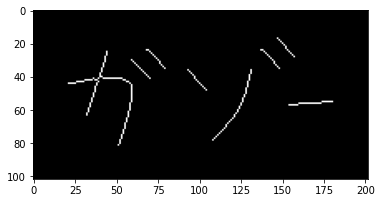

In [17]:
plt.imshow(result, cmap='gray')

## Q.65. Zhang-Suenの細線化

In [18]:
def check_clockwise(neighbor):
    tmp = neighbor.copy()
    tmp = 1 - tmp
    
    x9, x2, x3 = tmp[0, :3]
    x8,  _, x4 = tmp[1, :3]
    x7, x6, x5 = tmp[2, :3]

    count = 0
    xs = [x2, x3, x4, x5, x6, x7, x8, x9, x2]
    for i, x in enumerate(xs[:-1]):
        next_x = xs[i + 1]
        if x == 0 and next_x == 1:
            count += 1
    
    return count == 1

def check_count_of_1(neighbor):
    tmp = neighbor.copy()
    tmp = 1 - tmp
    
    tmp[1, 1] = 0
    return 2 <= np.sum(tmp) <= 6

def check_count_of_1_in_neighbor4(neighbor, omit_dir):
    tmp = neighbor.copy()
    tmp = 1 - tmp

    x9, x2, x3 = tmp[0, :3]
    x8,  _, x4 = tmp[1, :3]
    x7, x6, x5 = tmp[2, :3]

    xs = [x2, x4, x6, x8]
    xs[(omit_dir - 2) // 2] = 0

    return 1 in xs

In [19]:
result = np.zeros_like(gazo_img).astype(np.int)
result[gazo_img > 0] = 1

while True:
    changed = False

    tmp = result.copy()
    tmp = np.pad(tmp, (1, 1), 'constant')
    for i in range(result.shape[0]):
        for j in range(result.shape[1]):
            if tmp[i+1, j+1] == 0:
                continue

            neighbor = tmp[i:i+3, j:j+3].copy()
            if not check_clockwise(neighbor):
                continue
            if not check_count_of_1(neighbor):
                continue
            if not check_count_of_1_in_neighbor4(neighbor, 2):
                continue
            if not check_count_of_1_in_neighbor4(neighbor, 8):
                continue

            result[i, j] = 0
            changed = True
                
    tmp = result.copy()
    tmp = np.pad(tmp, (1, 1), 'constant')
    for i in range(result.shape[0]):
        for j in range(result.shape[1]):
            if tmp[i+1, j+1] == 0:
                continue

            neighbor = tmp[i:i+3, j:j+3].copy()
            if not check_clockwise(neighbor):
                continue
            if not check_count_of_1(neighbor):
                continue
            if not check_count_of_1_in_neighbor4(neighbor, 6):
                continue
            if not check_count_of_1_in_neighbor4(neighbor, 4):
                continue

            result[i, j] = 0
            changed = True

    if not changed:
        break

result *= 255
result = result.astype(np.uint8)

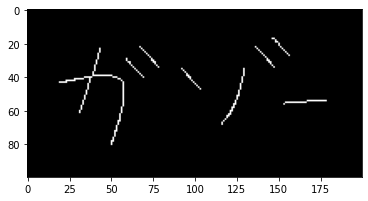

In [20]:
plt.imshow(result, cmap='gray')

## Q.66. HOG (Step.1) 勾配強度・勾配角度

In [21]:
orig = imori_img.copy().astype(np.float)
lum = orig[:, :, 0] * 0.2126 + orig[:, :, 1] * 0.7152 + orig[:, :, 2] * 0.0722

lum = np.pad(lum, (1, 1), 'edge')
gx = lum[1:-1, 2:] - lum[1:-1, :-2]
gy = lum[2:, 1:-1] - lum[:-2, 1:-1]

mag = np.sqrt(gx ** 2 + gy ** 2)
gx[np.abs(gx) < 1e-10] = 1e-10
ang = np.arctan(gy / gx)
q_ang = ((ang * 180 / np.pi) % 180) // 20
q_ang = q_ang.astype(np.int8)

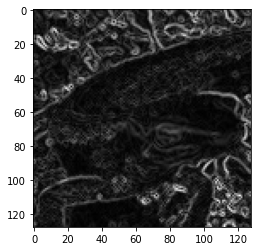

In [22]:
plt.imshow(mag, cmap='gray')

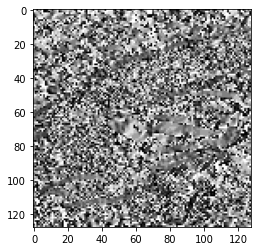

In [23]:
plt.imshow(q_ang, cmap='gray')

## Q.67. HOG (Step.2) 勾配ヒストグラム

In [24]:
orig = q_ang.copy()

N = 8
h = (orig.shape[0] + N - 1) // N
w = (orig.shape[1] + N - 1) // N

cells = np.zeros((h, w, 9))

for i in range(orig.shape[0]):
    for j in range(orig.shape[1]):
        i_cell = i // N
        j_cell = j // N
        cells[i_cell, j_cell, orig[i, j]] += mag[i, j]

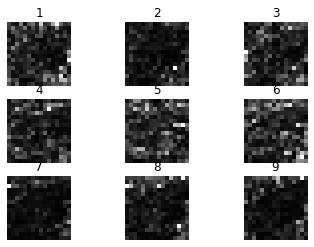

In [25]:
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(cells[:, :, i], cmap='gray')
    plt.title(i + 1)
    plt.axis('off')
    plt.xticks(color="None")
    plt.yticks(color="None")

plt.show()

## Q.68. HOG (Step.3) ヒストグラム正規化

In [26]:
orig = cells.copy()
normalized = orig.copy()

C = 3
epsilon = 1

orig = np.pad(orig, (C // 2, C // 2), 'constant')

for i in range(normalized.shape[0]):
    for j in range(normalized.shape[1]):
        normalized[i, j] /= np.sqrt(np.sum(orig[i:i+C, j:j+C] ** 2) + epsilon)

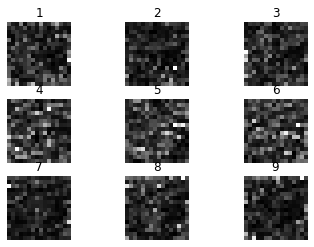

In [27]:
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(normalized[:, :, i], cmap='gray')
    plt.title(i + 1)
    plt.axis('off')
    plt.xticks(color="None")
    plt.yticks(color="None")

plt.show()

## Q.69. HOG (Step.4) 特徴量の描画

In [28]:
def draw(gray, histogram, N=8):
    # get shape
    H, W = gray.shape
    cell_N_H, cell_N_W, _ = histogram.shape

    ## Draw
    out = gray[1 : H + 1, 1 : W + 1].copy().astype(np.uint8)

    for y in range(cell_N_H):
        for x in range(cell_N_W):
            cx = x * N + N // 2
            cy = y * N + N // 2
            x1 = cx + N // 2 - 1
            y1 = cy
            x2 = cx - N // 2 + 1
            y2 = cy

            h = histogram[y, x] / np.sum(histogram[y, x])
            h /= h.max()

            for c in range(9):
                angle = (20 * c + 10) / 180. * np.pi
                rx = int(np.sin(angle) * (x1 - cx) + np.cos(angle) * (y1 - cy) + cx)
                ry = int(np.cos(angle) * (x1 - cx) - np.cos(angle) * (y1 - cy) + cy)
                lx = int(np.sin(angle) * (x2 - cx) + np.cos(angle) * (y2 - cy) + cx)
                ly = int(np.cos(angle) * (x2 - cx) - np.cos(angle) * (y2 - cy) + cy)

                # color is HOG value
                pt = int(255. * h[c])

                # draw line
                cv2.line(out, (lx, ly), (rx, ry), (pt, pt, pt), thickness=1)

    return out

In [29]:
orig = imori_img.copy()
lum = orig[:, :, 0] * 0.2126 + orig[:, :, 1] * 0.7152 + orig[:, :, 2] * 0.0722
dirs = normalized.copy()

result = draw(lum, dirs)

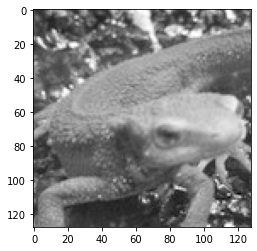

In [30]:
plt.imshow(lum, cmap='gray')

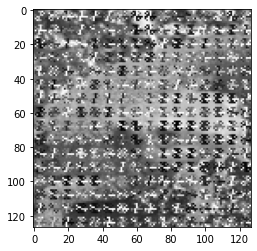

In [31]:
plt.imshow(result, cmap='gray')

## Q.70. カラートラッキング

In [32]:
def rgb_to_hsv(rgb):
    rgb = rgb.astype(np.float) / 255
    hsv = np.zeros_like(rgb)
    hsv[:, :, 1] = np.max(rgb, axis=2) - np.min(rgb, axis=2)
    hsv[:, :, 2] = np.max(rgb, axis=2)

    hsv[:, :, 0] = np.where(
        rgb[:, :, 2] == np.min(rgb, axis=2),
        60 * (rgb[:, :, 1] - rgb[:, :, 0]) / (hsv[:, :, 1] + 1e-18) + 60,
        hsv[:, :, 0],
    )
    hsv[:, :, 0] = np.where(
        rgb[:, :, 0] == np.min(rgb, axis=2),
        60 * (rgb[:, :, 2] - rgb[:, :, 1]) / (hsv[:, :, 1] + 1e-18) + 180,
        hsv[:, :, 0],
    )
    hsv[:, :, 0] = np.where(
        rgb[:, :, 1] == np.min(rgb, axis=2),
        60 * (rgb[:, :, 0] - rgb[:, :, 2]) / (hsv[:, :, 1] + 1e-18) + 300,
        hsv[:, :, 0],
    )

    hsv[:, :, 0] %= 360
    
    return hsv

In [33]:
rgb = imori_img.copy()
hsv = rgb_to_hsv(rgb)
h = hsv[:, :, 0]

result = np.zeros_like(h).astype(np.uint8)
result[(h >= 180) * (h <= 260)] = 255

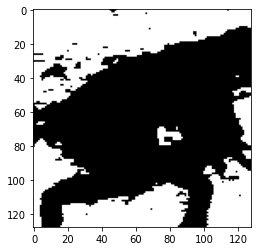

In [34]:
plt.imshow(result, cmap='gray')